In [5]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

df = pd.read_csv("/content/housepricedata.csv")

In [6]:
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [7]:
dataset = df.values

In [8]:
print(dataset[:5,:])

[[ 8450     7     5   856     2     1     3     8     0   548     1]
 [ 9600     6     8  1262     2     0     3     6     1   460     1]
 [11250     7     5   920     2     1     3     6     1   608     1]
 [ 9550     7     5   756     1     0     3     7     1   642     0]
 [14260     8     5  1145     2     1     4     9     1   836     1]]


In [9]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [10]:
# first 10 columns (not counting the name column) as features
X = dataset[:,0:10]
# last column as output
Y = dataset[:,-1]

In [11]:
# initiate a scaler by calling it from sklearn. Just like initiate a LinearRegressor or LogisticRegressor.
min_max_scaler = preprocessing.MinMaxScaler()

# apply scaling to our data by calling fit_transform()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale[:5,:5]

array([[0.0334198 , 0.66666667, 0.5       , 0.1400982 , 0.66666667],
       [0.03879502, 0.55555556, 0.875     , 0.20654664, 0.66666667],
       [0.04650728, 0.66666667, 0.5       , 0.15057283, 0.66666667],
       [0.03856131, 0.66666667, 0.5       , 0.12373159, 0.33333333],
       [0.06057632, 0.77777778, 0.5       , 0.18739771, 0.66666667]])

In [13]:
# split 8 parts out of 10 for training
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
# split 1 part out of 10 for each validation and test set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
# training size
print('Training set:', X_train.shape, Y_train.shape)
# validation size
print('Validation set:', X_val.shape, Y_val.shape)
# test size
print('Test set:', X_test.shape, Y_test.shape)

Training set: (1168, 10) (1168,)
Validation set: (146, 10) (146,)
Test set: (146, 10) (146,)


In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid'),
])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
37/37 [==============================] - 3s 9ms/step - loss: 0.6720 - accuracy: 0.6592 - val_loss: 0.6563 - val_accuracy: 0.7260
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7868 - val_loss: 0.5955 - val_accuracy: 0.7603
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 0.5317 - accuracy: 0.8176 - val_loss: 0.5002 - val_accuracy: 0.8562
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8510 - val_loss: 0.4070 - val_accuracy: 0.8562
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8690 - val_loss: 0.3703 - val_accuracy: 0.8630
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8716 - val_loss: 0.3259 - val_accuracy: 0.8767
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.8818 - val_loss: 0.3033 - val_accuracy: 0.8767
Epoch 8/50
37/37 [==

In [19]:
loss_value, metric_value = model.evaluate(X_test, Y_test)

print('Loss:', loss_value)
print('Accuracy:', metric_value)

5/5 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.8904
Loss: 0.26136642694473267
Accuracy: 0.8904109597206116


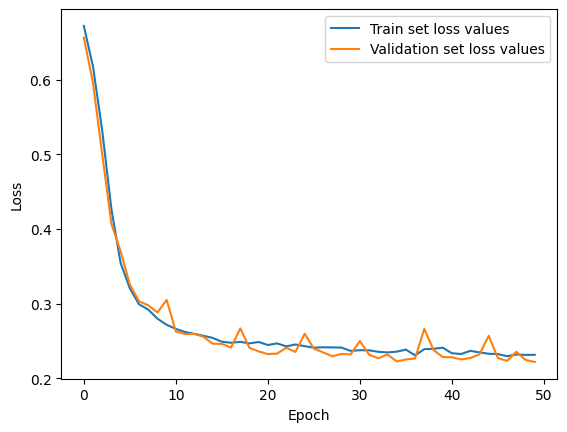

In [20]:
plt.plot(hist.history['loss'], label='Train set loss values')
plt.plot(hist.history['val_loss'], label='Validation set loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

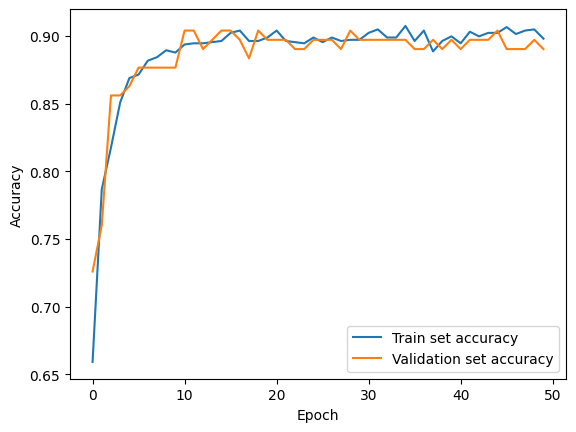

In [21]:
plt.plot(hist.history['accuracy'], label='Train set accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation set accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
37/37 [==============================] - 3s 57ms/step - loss: 0.4779 - accuracy: 0.7877 - val_loss: 0.3694 - val_accuracy: 0.8562
Epoch 2/100
37/37 [==============================] - 2s 50ms/step - loss: 0.3312 - accuracy: 0.8724 - val_loss: 0.3336 - val_accuracy: 0.8288
Epoch 3/100
37/37 [==============================] - 4s 98ms/step - loss: 0.3011 - accuracy: 0.8724 - val_loss: 0.2893 - val_accuracy: 0.8767
Epoch 4/100
37/37 [==============================] - 4s 97ms/step - loss: 0.2967 - accuracy: 0.8904 - val_loss: 0.3120 - val_accuracy: 0.8699
Epoch 5/100
37/37 [==============================] - 4s 102ms/step - loss: 0.2614 - accuracy: 0.8955 - val_loss: 0.2634 - val_accuracy: 0.8904
Epoch 6/100
37/37 [==============================] - 3s 88ms/step - loss: 0.2671 - accuracy: 0.8947 - val_loss: 0.2555 - val_accuracy: 0.9041
Epoch 7/100
37/37 [==============================] - 4s 116ms/step - loss: 0.2498 - accuracy: 0.9015 - val_loss: 0.2561 - val_accuracy: 0.8904
Epoc